In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [202]:
def cost(actual, predicted):
    return np.sum(np.square(actual-predicted))/2/len(actual)

In [203]:
def gradients(x,y,predicted):
    n = len(x)
    w = -1*np.sum(y-predicted)/n
    b = -1*np.sum((y-predicted)*x)/n
    return w,b

In [204]:
def predict(x,weight,bias):
    return weight*x+bias

In [205]:
def gradientDescent(x,y, epoch, alpha=0.1):
    weight = []
    biases = []
    costs = []
    theta = random.random()
    bias = random.random()
    for i in range(epoch):
        predicted = predict(x,theta, bias)
        error = cost(y,predicted)
        delW, delB = gradients(x,y,predicted)
        theta -= alpha*delW
        bias -= alpha*delB
        if i%5==0:
            weight.append(theta)
            biases.append(bias)
            costs.append(error)
    
    return theta, bias, weight, biases, costs

In [206]:
data = pd.read_csv("../../datasets/salary.csv")
x = np.array(data['experience'])
y = np.array(data['salary'])

In [207]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y)

In [216]:
weight, bias, weights, biases, errors = gradientDescent(xtrain, ytrain ,60, alpha = 0.01)

Text(0, 0.5, 'Error')

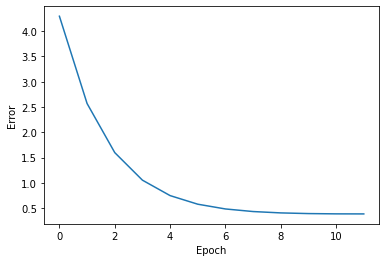

In [217]:
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")

In [210]:
from sklearn.linear_model import SGDRegressor as lr
model = lr( alpha = 0.01)
mw, mb, me = [],[],[]
for i in range(60):
    model.partial_fit(np.array(xtrain).reshape(-1,1), np.array(ytrain).reshape(-1,1).ravel())
    if i%5==0:
        mw.append(model.coef_[0])
        mb.append(model.intercept_[0])
        me.append(cost(ytest, model.predict(xtest.reshape(-1,1))))

In [211]:
print(mw, end ='\n')
print("\nBias:\n")
print(mb, end = '\n')
print("\nError:\n")
print(me, end = '\n')

[0.6778794808719213, 1.324140037579534, 1.4217173319231664, 1.4432782879693635, 1.451625182883851, 1.4551828885755975, 1.4585349146846718, 1.4596854482547572, 1.460785909179733, 1.4631039025748083, 1.4632368065736852, 1.4662495014727999]

Bias:

[0.2147985780301706, 0.4143368148594108, 0.4376192835659985, 0.43681575405627987, 0.4323461141976636, 0.4267642867642444, 0.4215029959320903, 0.41583483169272883, 0.4103745415350655, 0.4055455915652018, 0.40024129743270864, 0.396118920720012]

Error:

[2.4828626132734843, 0.10412045945220315, 0.16504097450579905, 0.19026529259788627, 0.19930941968432528, 0.20160482485245854, 0.20380122735879969, 0.20276235294402803, 0.201757086664629, 0.20273408996065645, 0.20046983726053794, 0.20273901979448097]


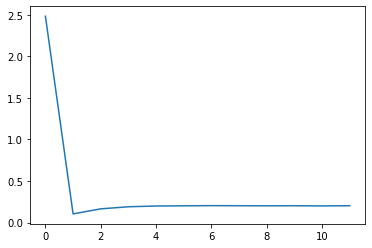

In [212]:
plt.plot(me, label = 'sklearn')

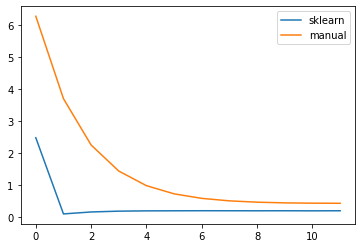

In [213]:
plt.plot(me, label = 'sklearn')
plt.plot(errors, label = 'manual')
plt.legend()